In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json
from config import gmap_api_key
import gmaps
from ipywidgets.embed import embed_minimal_html
pd.options.mode.chained_assignment = None  # default='warn'

In [93]:
state_dataset = pd.read_csv("Resources/state_dataset.csv")
state_dataset
labels = pd.DataFrame({"Time Period Label":state_dataset["Time Period Label"].unique(),"Time Period Start Date":state_dataset["Time Period Start Date"].unique()})

In [94]:
recent =state_dataset.loc[state_dataset["Time Period Label"]=="Jun 29 - Jul 11, 2022",:]
coordinates = recent[["Lat","Lng"]]
recent_weights = recent["Value"]
gmaps.configure(api_key=gmap_api_key)
fig = gmaps.figure()
heat_layer = gmaps.heatmap_layer(coordinates, weights=recent_weights, 
                                         dissipating=False,max_intensity=max(recent["Value"]),
                                         point_radius=1)
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

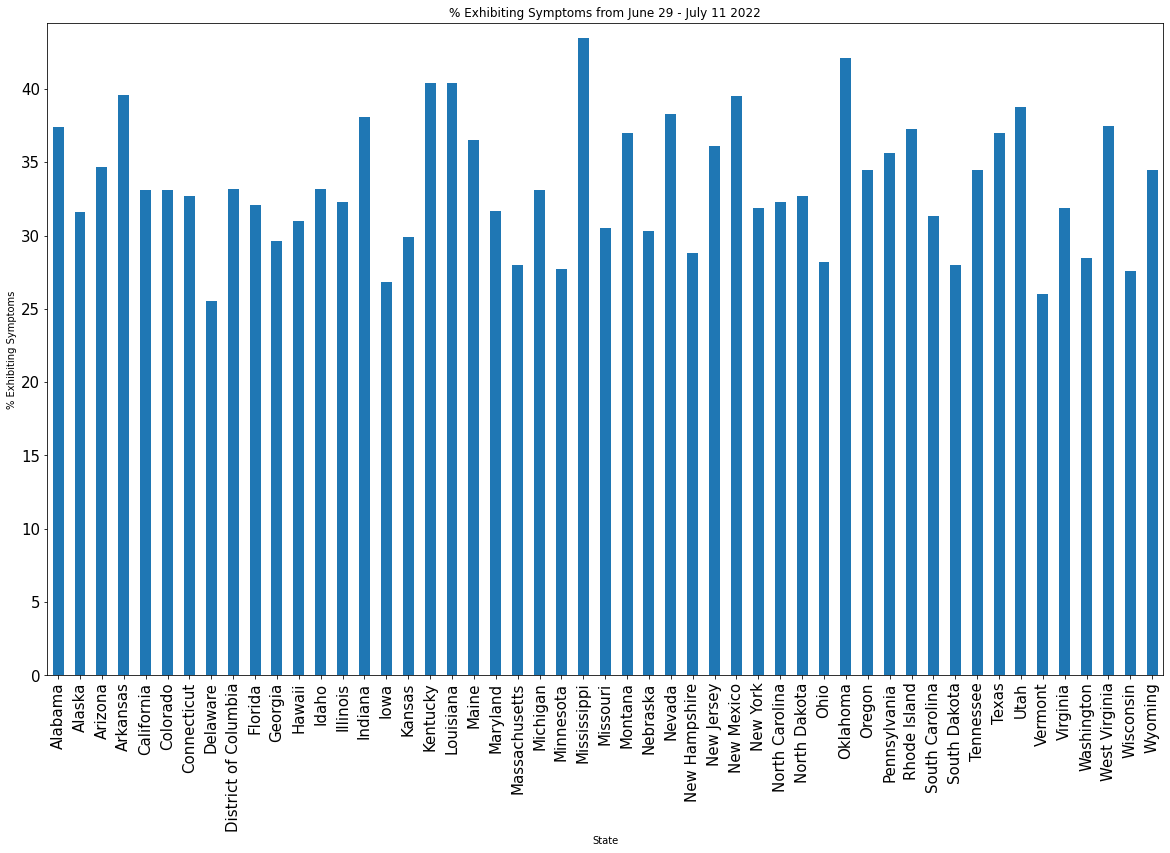

In [43]:
recent.plot(kind="bar",x="State",y="Value",xlabel="State",ylabel="% Exhibiting Symptoms",figsize=(20,12),
                 ylim=(0,max(recent["Value"]+1)),legend=False,fontsize=15,title="% Exhibiting Symptoms from June 29 - July 11 2022")
plt.show()

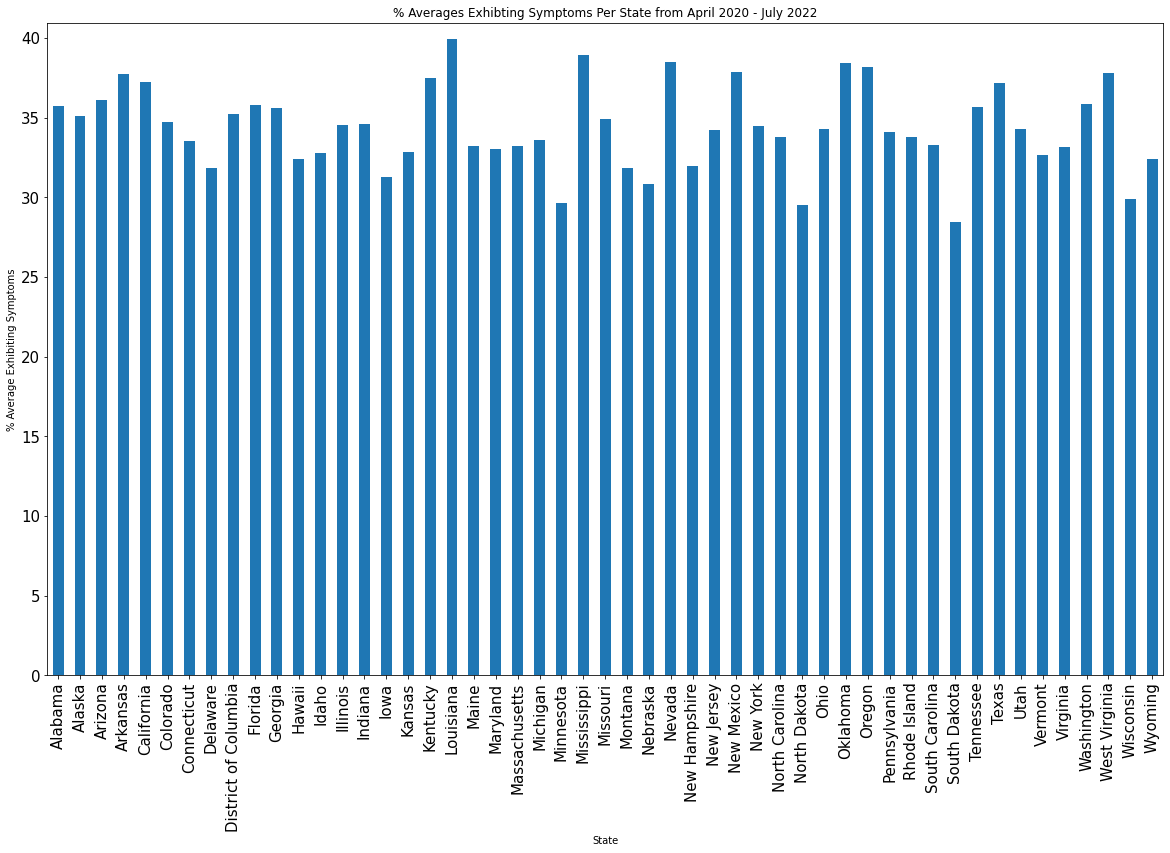

In [44]:
state_avg = pd.DataFrame(state_dataset.groupby("State").mean()["Value"])
state_avg.plot(kind="bar",y="Value",xlabel="State",ylabel="% Average Exhibiting Symptoms",
                 title = "% Averages Exhibting Symptoms Per State from April 2020 - July 2022",figsize=(20,12),
                 ylim=(0,max(state_avg["Value"]+1)),legend=False,fontsize=15)
plt.show()

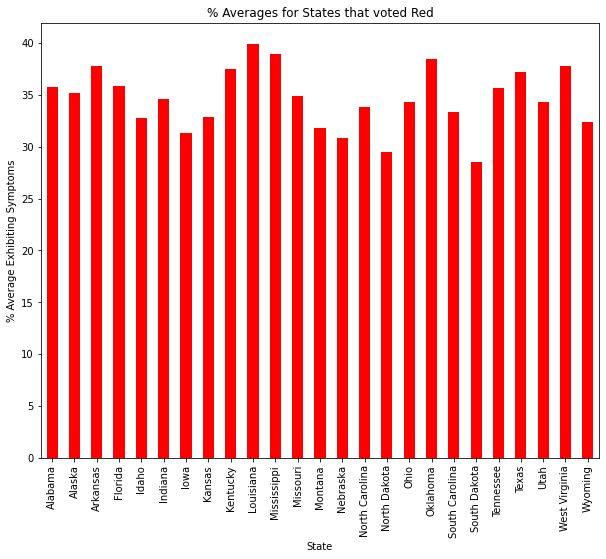

In [61]:
state_ave = pd.DataFrame(state_dataset.groupby(["State","called","Trifecta status"]).mean()["Value"]).reset_index()
state_ave.sort_values("Value",ascending=False).head(5)
state_ave.loc[state_ave["called"]=="R"].plot(kind="bar",x="State",y="Value",color="red",
                                             figsize=(10,8),legend=False,ylabel="% Average Exhibiting Symptoms",
                                             title="% Averages for States that voted Red")
plt.show()

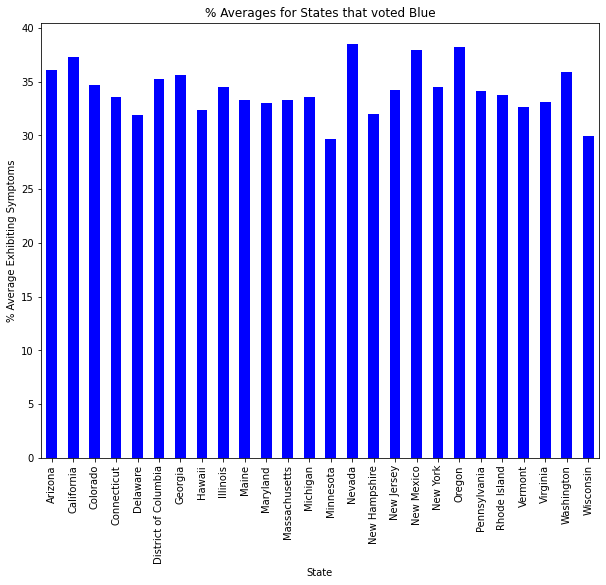

In [60]:
state_ave.loc[state_ave["called"]=="D"].plot(kind="bar",x="State",y="Value",color="blue",
                                             figsize=(10,8),legend=False,ylabel="% Average Exhibiting Symptoms",
                                            title="% Averages for States that voted Blue")
plt.show()

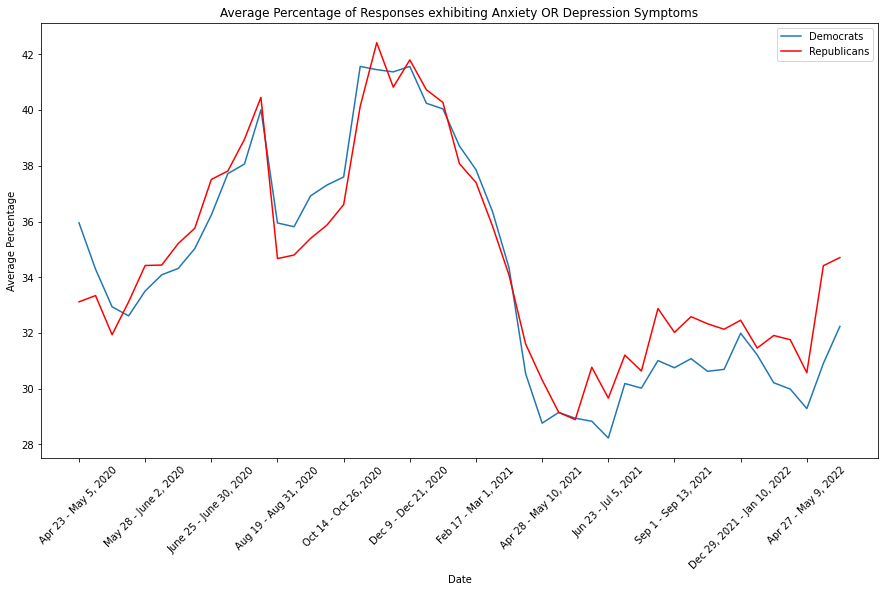

In [96]:
plt.figure(figsize=(15,8))
democrats_mental = pd.DataFrame(state_dataset.loc[state_dataset["called"]=="D",:].groupby("Time Period Start Date").mean() \
["Value"]).reset_index(drop=False).sort_values("Time Period Start Date")
democrats_mental = pd.merge(democrats_mental,labels,on="Time Period Start Date")
republicans_mental = state_dataset.loc[state_dataset["called"]=="R",:].groupby("Time Period Start Date").mean() \
["Value"].reset_index(drop=False).sort_values("Time Period Start Date")
plt.plot(democrats_mental["Time Period Start Date"],democrats_mental["Value"])
plt.plot(republicans_mental["Time Period Start Date"],republicans_mental["Value"],color="red")
plt.legend(["Democrats","Republicans"],loc="best")
plt.title("Average Percentage of Responses exhibiting Anxiety OR Depression Symptoms")
label = democrats_mental["Time Period Start Date"]
tick_loc = label[0:len(label):4]
dates=democrats_mental["Time Period Label"]
xticks=dates[0:len(dates):4]
plt.xticks(ticks=tick_loc,labels=xticks,rotation=45)
plt.ylabel("Average Percentage")
plt.xlabel("Date")
plt.show()

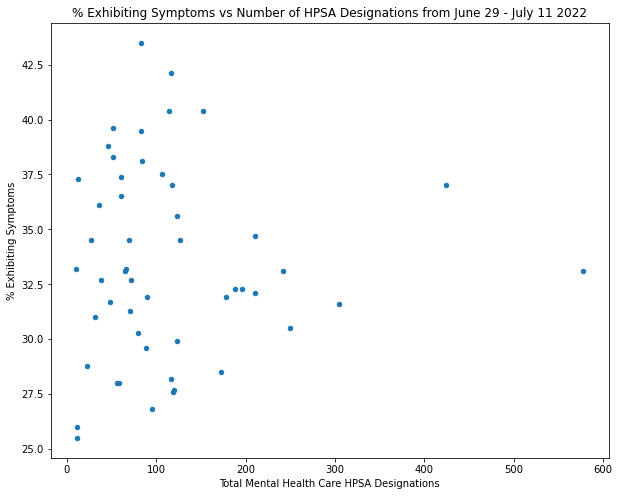

In [62]:
recent.plot(kind="scatter",x='Total Mental Health Care HPSA Designations',y="Value",ylabel="% Exhibiting Symptoms",
                    title="% Exhibiting Symptoms vs Number of HPSA Designations from June 29 - July 11 2022",figsize=(10,8))
plt.show()

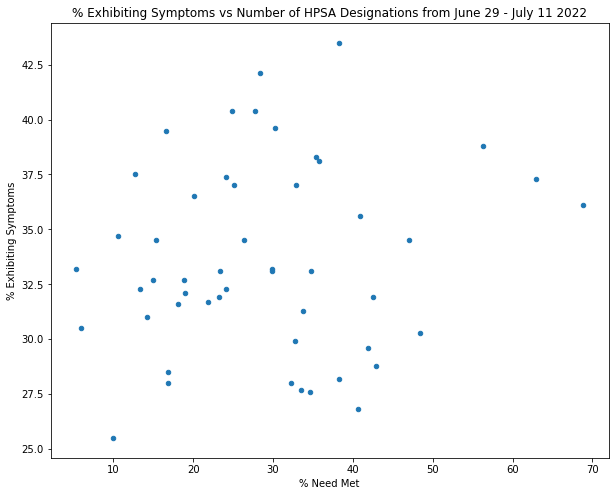

In [66]:
recent["% Need Met"]=recent["Percent of Need Met"]*100
recent.plot(kind="scatter",x='% Need Met',y="Value",ylabel="% Exhibiting Symptoms",
                    title="% Exhibiting Symptoms vs Number of HPSA Designations from June 29 - July 11 2022",figsize=(10,8))
plt.show()

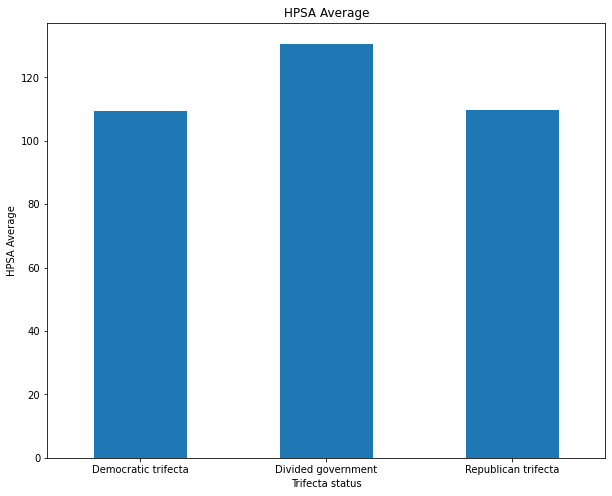

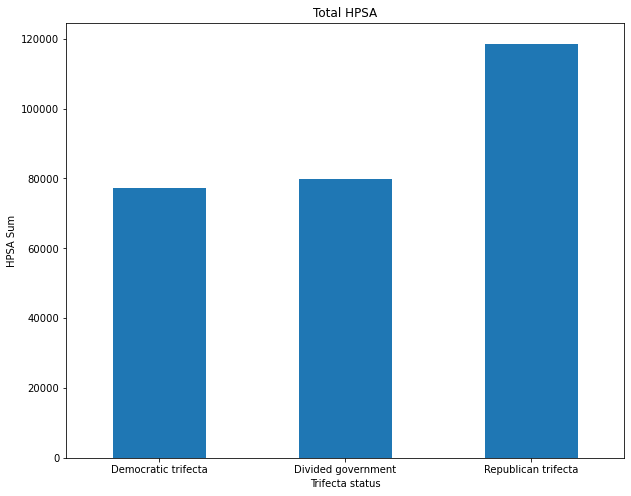

In [70]:
summary_gov.plot(kind="bar",y="HPSA Average",ylabel="HPSA Average",figsize=(10,8),rot=360,legend=False,title="HPSA Average")
summary_gov.plot(kind="bar",y="HPSA Sum",ylabel="HPSA Sum",figsize=(10,8),rot=360,legend=False,title="Total HPSA")
plt.show()

# Conclusions

1. At a glance, Red states report higher percentages of anxiety or depression symptoms, nothing conclusive. It would be more approriate to say that depression and anxiety affect everyone regardless of political party.
2. A mental health survey with a question of political party would be better suited to tackle that analysis.
3. The amount of health professional shortage areas do not seem to have an effect on mental health. Scatter plots show no meaningful takeaways. This possibly gets into a public health discussion and how we as a society talk about mental health.
4. State government makeup may have a slight effect on health professional shortage areas. Divided state governments have more HPSA on average. States with a Republican trifecta have the greatest total sum of HPSAs.